In [6]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('Pertemuan 8/Graduate.csv', index_col = 0, usecols = [0,2,3,4,5,6,7,8,9])
df

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,337,118,Very Good,4.5,4.5,9.65,1,0.92
1,324,107,Very Good,4.0,4.5,8.87,1,0.76
2,316,104,Good,3.0,3.5,8.00,1,0.72
3,322,110,Good,3.5,2.5,8.67,1,0.80
4,314,103,Fair,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
190,324,111,Excellent,4.5,4.0,9.16,1,0.90
191,323,110,Excellent,4.0,5.0,8.98,1,0.87
192,322,114,Excellent,4.5,4.0,8.94,1,0.86
193,336,118,Excellent,4.5,5.0,9.53,1,0.94


In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
0,337,118,Very Good,4.5,4.5,9.65,1
1,324,107,Very Good,4.0,4.5,8.87,1
2,316,104,Good,3.0,3.5,8.00,1
3,322,110,Good,3.5,2.5,8.67,1
4,314,103,Fair,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
190,324,111,Excellent,4.5,4.0,9.16,1
191,323,110,Excellent,4.0,5.0,8.98,1
192,322,114,Excellent,4.5,4.0,8.94,1
193,336,118,Excellent,4.5,5.0,9.53,1


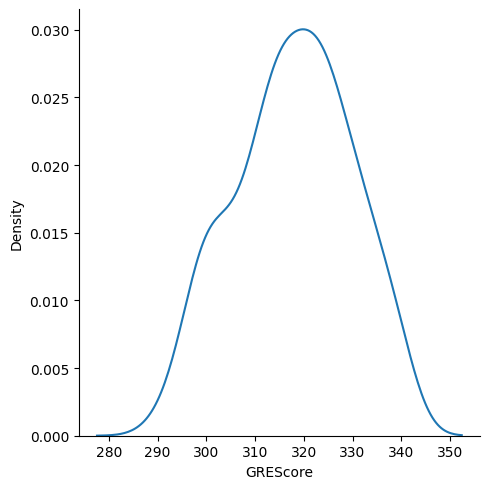

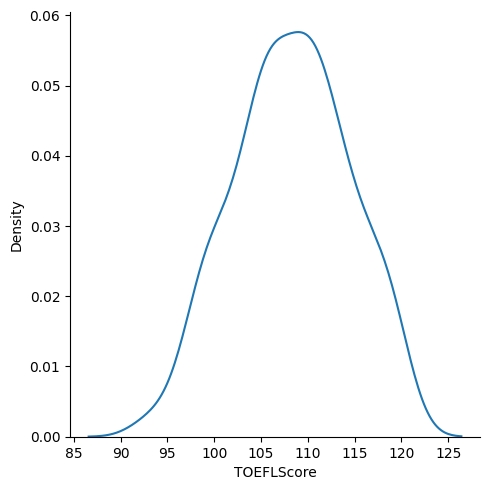

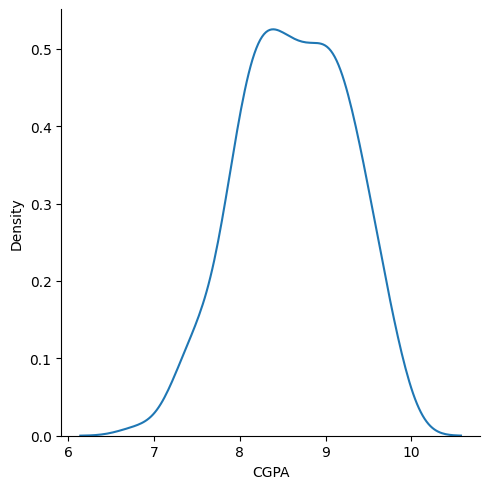

In [9]:
for cols in ['GREScore', 'TOEFLScore', 'CGPA']:
    sb.displot(X[cols], kind = 'kde')

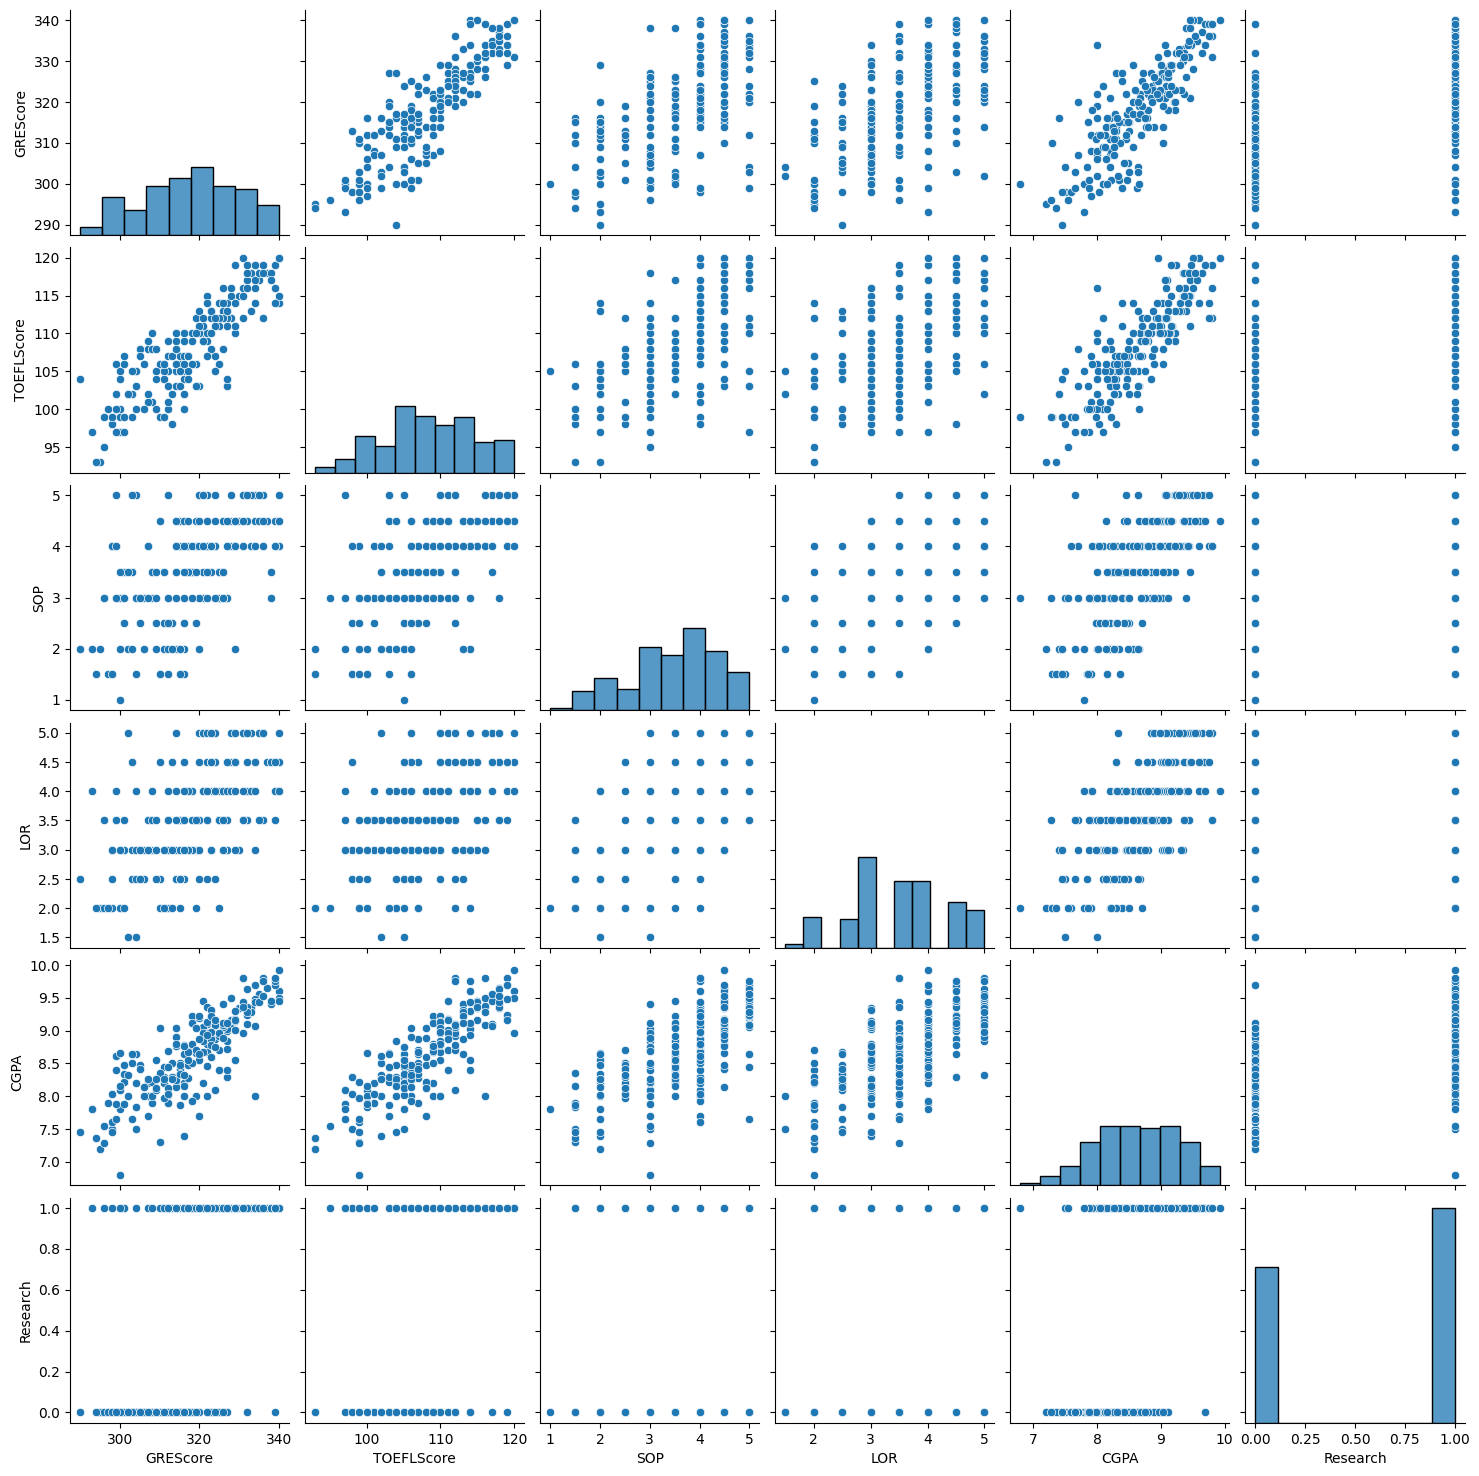

In [10]:
sb.pairplot(X)

In [11]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
scaler = MinMaxScaler()

In [12]:
categoric_cols = ['UniversityRating', 'Research']
numeric_cols = [cols for cols in X.columns if cols not in categoric_cols]

In [13]:
X_scaled = pd.DataFrame(scaler.fit_transform(X[numeric_cols]),
                        columns = scaler.get_feature_names_out())
X_encoded = pd.DataFrame(ohe.fit_transform(X[categoric_cols]),
                         columns = ohe.get_feature_names_out())

X_preprocessed = pd.concat([X_scaled, X_encoded], axis = 1)
X_preprocessed

C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,GREScore,TOEFLScore,SOP,LOR,CGPA,UniversityRating_Excellent,UniversityRating_Fair,UniversityRating_Good,UniversityRating_Poor,UniversityRating_Very Good,Research_0,Research_1
0,0.94,0.925926,0.875,0.857143,0.913462,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.68,0.518519,0.750,0.857143,0.663462,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.52,0.407407,0.500,0.571429,0.384615,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.64,0.629630,0.625,0.285714,0.599359,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.48,0.370370,0.250,0.428571,0.451923,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.68,0.666667,0.875,0.714286,0.756410,1.0,0.0,0.0,0.0,0.0,0.0,1.0
191,0.66,0.629630,0.750,1.000000,0.698718,1.0,0.0,0.0,0.0,0.0,0.0,1.0
192,0.64,0.777778,0.875,0.714286,0.685897,1.0,0.0,0.0,0.0,0.0,0.0,1.0
193,0.92,0.925926,0.875,1.000000,0.875000,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size = 0.2, random_state = 26, shuffle = True)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

## Mean Absolute Error

<img src="https://raw.githubusercontent.com/ArviandanaR/Komputasi-Statistika-2-2024/main/Pertemuan%208/asset/MAE.png" alt="MAE Formula" width="500"/>

JELASIN BLA BLA BLA

In [18]:
def MAE(y_pred, y_true):
    numerator = np.sum(np.abs(y_pred - y_true))
    denominator = len(y_true)
    mae = numerator / denominator
    return mae

MAE(y_pred, y_test)

0.050832398221224824

## Mean Squared Error

<img src="https://raw.githubusercontent.com/ArviandanaR/Komputasi-Statistika-2-2024/main/Pertemuan%208/asset/MSE.png" alt="MSE Formula" width="500"/>

JELASIN BLA BLA BLA

In [20]:
def MSE(y_pred, y_true):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = len(y_true)
    mse = numerator / denominator
    return mse

MSE(y_pred, y_test)

0.004705870762362117

## Root Mean Squared Error

<img src="https://raw.githubusercontent.com/ArviandanaR/Komputasi-Statistika-2-2024/main/Pertemuan%208/asset/RMSE.png" alt="MSE Formula" width="500"/>

JELASIN BLA BLA BLA

In [22]:
def RMSE(y_pred, y_true):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = len(y_true)
    rmse = np.sqrt(numerator / denominator)
    return rmse

RMSE(y_pred, y_test)

0.06859934957681535

## Mean Absolute Percentage Error

<img src="https://raw.githubusercontent.com/ArviandanaR/Komputasi-Statistika-2-2024/main/Pertemuan%208/asset/MAPE.png" alt="MAE Formula" width="500"/>

JELASIN BLA BLA BLA

In [23]:
def MAPE(y_pred, y_true):
    abs_value = np.abs((y_true - y_pred) / y_true)
    numerator = np.sum(abs_value)
    denominator = len(y_true)
    mape = numerator / denominator
    return mape

MAPE(y_pred, y_test)

0.08023259895209599

## R-Squared

<p float="left">
  <img src="https://raw.githubusercontent.com/ArviandanaR/Komputasi-Statistika-2-2024/main/Pertemuan%208/asset/R2.png" width="500" />
  <img src="https://raw.githubusercontent.com/ArviandanaR/Komputasi-Statistika-2-2024/main/Pertemuan%208/asset/SSR.png" width="500" /> 
  <img src="https://raw.githubusercontent.com/ArviandanaR/Komputasi-Statistika-2-2024/main/Pertemuan%208/asset/SST.png" width="500" />
</p>

JELASIN BLA BLA BLA

In [ ]:
# Latihan
# Buatlah fungsi untuk menghitung nilai R-Squared

def R2(None, None):
    None
    return r2

In [ ]:
from sklearn.metrics import 